RFM analysis is a technique used in marketing and customer relationship management to segment customers based on their recent purchase behavior, frequency of purchases, 
and monetary value of purchases. It helps identify different groups of customers and tailor marketing strategies to each group's characteristics.

Here's how RFM analysis works:

- Recency (R): How recently did the customer make a purchase? Customers who have made a purchase more recently are likely to be more engaged and valuable.
- Frequency (F): How often does the customer make purchases? Customers who make frequent purchases are more likely to be loyal and valuable.
- Monetary (M): What is the monetary value of the customer's purchases? Customers who spend more money are likely to be high-value customers.

To conduct RFM analysis in Python, you can follow these steps:
1. Calculate the recency, frequency, and monetary value for each customer.
2. Segment customers into different groups based on their RFM scores.
3. Analyze and interpret the characteristics of each customer segment.
4. Develop targeted marketing strategies for each segment.

In [7]:
# Import approrpiate packages
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/rorybennett/Documents/Data Science/TB2/DSMP/exploratory_analysis/fake_transactional_data_24.csv', 
                 parse_dates=['not_happened_yet_date'], 
                 dayfirst=True)

In [8]:
# Calculate Recency (number of days since last purchase), Frequency (total number of purchases), and Monetary (total amount spent) value for each customer
rfm_data = df.groupby('from_totally_fake_account').agg({
    'not_happened_yet_date': lambda x: (df['not_happened_yet_date'].max() - x.max()).days,
    'to_randomly_generated_account': 'count',
    'monopoly_money_amount': 'sum'
}).reset_index()

# Rename the columns for better understanding
rfm_data.rename(columns={
    'not_happened_yet_date': 'Recency',
    'to_randomly_generated_account': 'Frequency',
    'monopoly_money_amount': 'Monetary'
}, inplace=True)

In [10]:
# Print the RFM data
print(rfm_data.tail())

      from_totally_fake_account  Recency  Frequency  Monetary
8137                   100931.0        0       1664  22332.81
8138                   100934.0        1       1111  18579.25
8139                   100947.0        0       1586  20783.20
8140                   100986.0        0       1034  15314.23
8141                   100988.0        0       1351  19714.77


Once you have calculated the RFM scores for each customer, you can further analyze and segment the customers into different groups based on these scores. One common 
approach is to use quartiles to divide customers into segments:

1. Calculate Quartiles: Calculate quartiles for each RFM score to divide customers into four equal-sized groups (quartiles).
2. Assign RFM Scores: Assign a score of 1 to 4 to each customer based on which quartile they fall into for each RFM score (4 being the highest).
3. Combine RFM Scores: Combine the three individual RFM scores into a single RFM score (e.g., 4-4-4 for the highest quartile in each category).
4. Segment Customers: Segment customers into different groups based on their combined RFM scores.
5. Analyze Customer Segments: Analyze the characteristics and behavior of each customer segment to identify key insights and develop targeted marketing strategies.

In [11]:
# Calculate quartiles for each RFM score
recency_quartiles = rfm_data['Recency'].quantile(q=[0.25, 0.5, 0.75])
frequency_quartiles = rfm_data['Frequency'].quantile(q=[0.25, 0.5, 0.75])
monetary_quartiles = rfm_data['Monetary'].quantile(q=[0.25, 0.5, 0.75])

# Assign RFM scores to each customer
def assign_rfm_score(x, quartiles):
    if x <= quartiles[0.25]:
        return 1
    elif x <= quartiles[0.5]:
        return 2
    elif x <= quartiles[0.75]:
        return 3
    else:
        return 4

rfm_data['RecencyScore'] = rfm_data['Recency'].apply(assign_rfm_score, args=(recency_quartiles,))
rfm_data['FrequencyScore'] = rfm_data['Frequency'].apply(assign_rfm_score, args=(frequency_quartiles,))
rfm_data['MonetaryScore'] = rfm_data['Monetary'].apply(assign_rfm_score, args=(monetary_quartiles,))

# Combine RFM scores into a single RFM score
rfm_data['RFM_Score'] = rfm_data['RecencyScore'].map(str) + '-' + rfm_data['FrequencyScore'].map(str) + '-' + rfm_data['MonetaryScore'].map(str)

# Segment customers based on RFM score
rfm_segments = {
    'Best Customers': '4-4-4',
    'Loyal Customers': '3-4-4',
    'Big Spenders': '4-3-4',
    'Almost Lost': '3-3-3',
    'Lost Customers': '2-2-2',
    'Churned Customers': '1-1-1'
}

# Analyze customer segments
segment_counts = rfm_data['RFM_Score'].value_counts().reset_index()
segment_counts.columns = ['RFM_Score', 'Count']

In [17]:
# Print the count of customers in each segment
print("Count of customers in each segment:")
print(segment_counts)

Count of customers in each segment:
   RFM_Score  Count
0      1-4-3    627
1      1-4-4    576
2      1-4-2    521
3      1-3-2    495
4      1-3-4    479
5      1-3-3    471
6      1-1-1    446
7      1-2-1    442
8      1-2-2    408
9      1-2-4    359
10     1-2-3    345
11     1-3-1    333
12     4-1-1    320
13     1-4-1    298
14     1-1-3    285
15     1-1-4    266
16     1-1-2    240
17     4-1-4    174
18     4-1-2    164
19     4-2-1    155
20     4-1-3    143
21     4-2-2    127
22     4-2-4    105
23     4-2-3    100
24     4-3-2     77
25     4-3-4     73
26     4-3-3     61
27     4-3-1     40
28     4-4-4      4
29     4-4-2      3
30     4-4-3      3
31     4-4-1      2


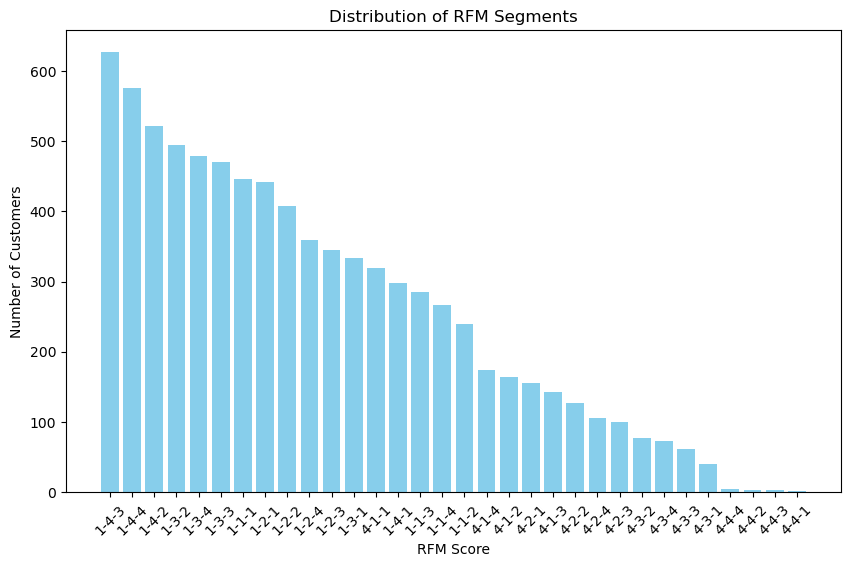

In [13]:
# Visualize the distribution of RFM scores
plt.figure(figsize=(10, 6))
plt.bar(segment_counts['RFM_Score'], segment_counts['Count'], color='skyblue')
plt.title('Distribution of RFM Segments')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

To further analyze each customer segment and develop targeted marketing strategies, you can examine various characteristics and behaviors of customers within each 
segment. Here are some key steps you can take:

1. Descriptive Statistics: Calculate summary statistics for each RFM score within each segment to understand the average recency, frequency, and monetary value of 
customers in that segment.
2. Segment Profiling: Create profiles for each customer segment by summarizing their demographic information, purchase history, and other relevant attributes.

In [14]:
# Group customers by RFM segment
rfm_segment_counts = rfm_data.groupby('RFM_Score').size().reset_index(name='Customer_Count')

# Calculate average RFM scores for each segment
rfm_segment_avg = rfm_data.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Merge counts and averages
rfm_segment_analysis = pd.merge(rfm_segment_counts, rfm_segment_avg, on='RFM_Score')

In [15]:
# Print segment analysis
print("RFM Segment Analysis:")
print(rfm_segment_analysis)

RFM Segment Analysis:
   RFM_Score  Customer_Count   Recency    Frequency      Monetary
0      1-1-1             446  0.000000   883.291480  14665.360650
1      1-1-2             240  0.000000   904.304167  19156.302375
2      1-1-3             285  0.000000   873.578947  25337.976105
3      1-1-4             266  0.000000   887.864662  31771.787932
4      1-2-1             442  0.000000  1069.861991  15723.546900
5      1-2-2             408  0.000000  1078.892157  19163.234755
6      1-2-3             345  0.000000  1071.939130  24375.135188
7      1-2-4             359  0.000000  1074.231198  32306.301309
8      1-3-1             333  0.000000  1292.462462  15793.316036
9      1-3-2             495  0.000000  1296.991919  19333.062646
10     1-3-3             471  0.000000  1306.218684  23903.162420
11     1-3-4             479  0.000000  1301.903967  33021.638225
12     1-4-1             298  0.000000  1686.667785  16011.228557
13     1-4-2             521  0.000000  1738.163148  1

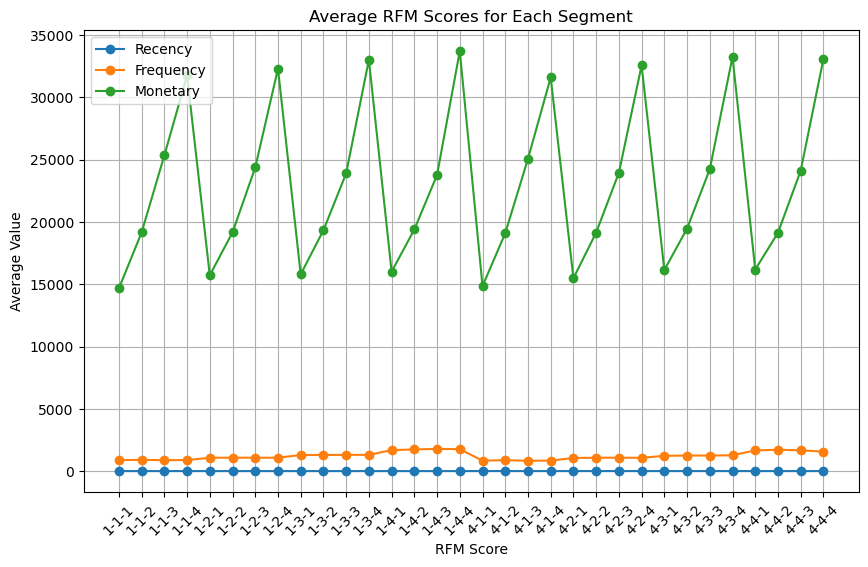

In [16]:
# Visualize average RFM scores for each segment
plt.figure(figsize=(10, 6))
plt.plot(rfm_segment_analysis['RFM_Score'], rfm_segment_analysis['Recency'], marker='o', linestyle='-', label='Recency')
plt.plot(rfm_segment_analysis['RFM_Score'], rfm_segment_analysis['Frequency'], marker='o', linestyle='-', label='Frequency')
plt.plot(rfm_segment_analysis['RFM_Score'], rfm_segment_analysis['Monetary'], marker='o', linestyle='-', label='Monetary')
plt.title('Average RFM Scores for Each Segment')
plt.xlabel('RFM Score')
plt.ylabel('Average Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()